In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import json
import os


In [3]:
for root, dirs, files in os.walk(r"C:\Users\sjf19\OneDrive\桌面\of28测试结果\单机8卡bert\bert_nl24_nah16_hs1024_fp16_actrue_mp1_pp8_mb32_gb512_1n8g"):
    
    print(root, "----------------",dirs , "----------------", files)
    print("----------------")

C:\Users\sjf19\OneDrive\桌面\of28测试结果\单机8卡bert\bert_nl24_nah16_hs1024_fp16_actrue_mp1_pp8_mb32_gb512_1n8g ---------------- ['59b64db', 'LibAI_bert_large_pretrain_graph_nl24_nah16_hs1024_FP16_actrue_DP2_MP1_PP4_zerofalse_stage0_mbs32_gbs512_acc8_1n8g'] ---------------- []
----------------
C:\Users\sjf19\OneDrive\桌面\of28测试结果\单机8卡bert\bert_nl24_nah16_hs1024_fp16_actrue_mp1_pp8_mb32_gb512_1n8g\59b64db ---------------- ['LibAI_bert_large_pretrain_graph_nl24_nah16_hs1024_FP16_actrue_DP2_MP1_PP4_zerofalse_stage0_mbs32_gbs512_acc8_1n8g'] ---------------- []
----------------
C:\Users\sjf19\OneDrive\桌面\of28测试结果\单机8卡bert\bert_nl24_nah16_hs1024_fp16_actrue_mp1_pp8_mb32_gb512_1n8g\59b64db\LibAI_bert_large_pretrain_graph_nl24_nah16_hs1024_FP16_actrue_DP2_MP1_PP4_zerofalse_stage0_mbs32_gbs512_acc8_1n8g ---------------- [] ---------------- ['config.yaml', 'log.txt', 'log.txt.rank1', 'log.txt.rank2', 'log.txt.rank3', 'log.txt.rank4', 'log.txt.rank5', 'log.txt.rank6', 'log.txt.rank7', 'metrics.json', 'out

In [4]:
with open(r"C:\Users\sjf19\OneDrive\桌面\of28测试结果\单机单卡bert\59b64db\LibAI_bert_large_pretrain_graph_nl24_nah16_hs1024_FP16_actrue_DP1_MP1_PP1_zerofalse_stage0_mbs32_gbs128_acc4_1n1g\metrics.json", 'r', encoding="utf-8", newline="\n") as f:
    for line in f.readlines():
        dev_data = json.loads(line)
        if 'total_loss' and 'iteration' in dev_data:
            print(dev_data["total_loss"])
            print(dev_data["iteration"])

10.82373046875
0
10.8271484375
1
10.83056640625
2
11.063232421875
3
11.2958984375
4
11.0958251953125
5
10.895751953125
6
10.8631591796875
7
10.83056640625
8
10.8271484375
9
10.82373046875
10
10.5472412109375
11
10.270751953125
12
10.270751953125
13
10.270751953125
14
10.1053466796875
15
9.93994140625
16
9.92169189453125
17
9.9034423828125
18
9.6988525390625
19
9.45025634765625
20
9.403564453125
21
9.35369873046875
22
9.2486572265625
23
9.12445068359375
24
8.99932861328125
25
8.9248046875
26
8.892333984375
27
8.8253173828125
28
8.7252197265625
29
8.6617431640625
30
8.57391357421875
31
8.496826171875
32
8.45343017578125
33
8.38494873046875
34
8.331298828125
35
8.29107666015625
36
8.2581787109375
37
8.21258544921875
38
8.15997314453125
39
8.11651611328125
40
8.08740234375
41
8.056396484375
42
8.03546142578125
43
8.02398681640625
44
8.01141357421875
45
7.98828125
46
7.981201171875
47
7.9608154296875
48
7.9608154296875
49
7.9608154296875
50
7.9608154296875
51
7.95306396484375
52
7.953063964

In [5]:
total_loss_values = []
total_x = []
master_y = []

In [6]:
for root, dirs, files in os.walk(r"C:\Users\sjf19\OneDrive\桌面\of28测试结果\单机8卡bert\bert_nl24_nah16_hs1024_fp16_actrue_mp1_pp8_mb32_gb512_1n8g"):
    print("---")
    for file in files:
        
        if file.endswith('.json'):
            print("***")
            try:
                with open(os.path.join(root, file), 'r', encoding="utf-8", newline="\n") as f:
                    com_x = []
                    dev_y = []
                    for line in f.readlines():
                        dev_data = json.loads(line)
                        dev_y.append(dev_data['total_loss'])
                        com_x.append(dev_data["iteration"])

            except Exception as e:
                print(f"Error opening file {os.path.join(root, file)}: {e}")
    
            total_loss_values.append(dev_y)
            total_x.append(com_x)

---
---
---
***
---
***


In [7]:
total_loss_values

[[7.89459228515625, 7.8631439208984375, 7.8622589111328125],
 [10.91204833984375]]

In [20]:
import matplotlib.pyplot as plt

def plot_three_arrays(arr):
    for i in range(0, len(arr), 3):
        if i+2 >= len(arr):
            break
        fig, axs = plt.subplots(1, 3, figsize=(10, 4))
        for j in range(3):
            x = range(len(arr[i+j]))
            y = arr[i+j]
            axs[j].plot(x, y)
            axs[j].set_title('Array {}'.format(i+j+1))
        plt.show()
        if i+5 >= len(arr):
            break
        fig, axs = plt.subplots(1, 3, figsize=(10, 4))
        for j in range(3):
            x1 = range(len(arr[i+j]))
            y1 = arr[i+j]
            axs[j].plot(x1, y1)
            axs[j].set_title('Array {}'.format(i+j+1))
            x2 = range(len(arr[i+j+1]))
            y2 = arr[i+j+1]
            axs[j].plot(x2, y2)
            axs[j].set_title('Array {} and {}'.format(i+j+1, i+j+2))
            x3 = range(len(arr[i+j+2]))
            y3 = arr[i+j+2]
            axs[j].plot(x3, y3)
            axs[j].set_title('Array {}, {} and {}'.format(i+j+1, i+j+2, i+j+3))
        plt.show()

In [9]:
import matplotlib.pyplot as plt

def plot_three_arrays(arr):
    for i in range(0, len(arr), 3):
        if i+2 >= len(arr):
            break
        fig, axs = plt.subplots(1, 3, figsize=(10, 4))
        for j in range(3):
            x = range(len(arr[i+j]))
            y = arr[i+j]
            axs[j].plot(x, y)
            axs[j].set_title('Array {}'.format(i+j+1))
        plt.show()

In [19]:
arr = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 
       [31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 
       [41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 
       [51, 52, 53, 54, 55, 56, 57, 58, 59, 60]]

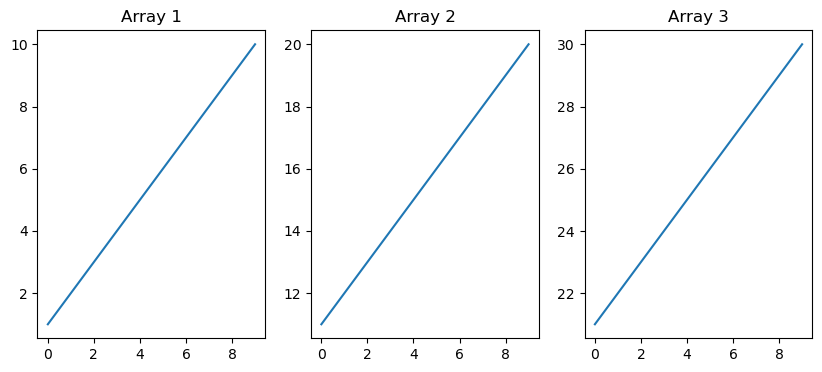

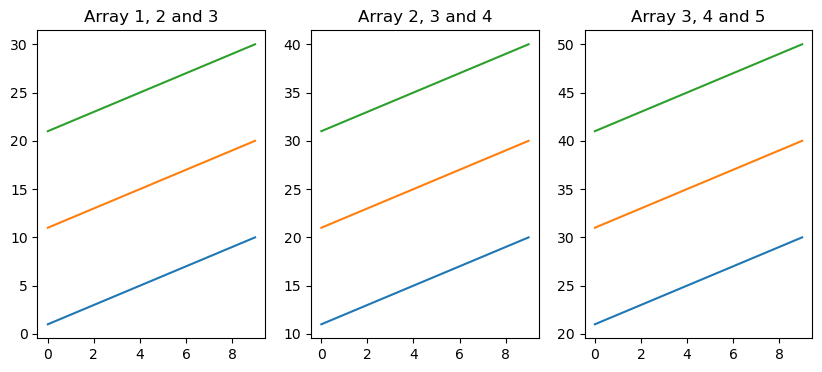

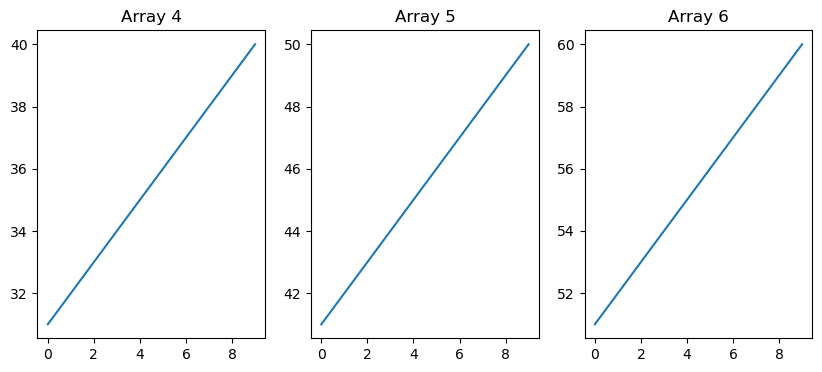

In [21]:
plot_three_arrays(arr)

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_three_arrays(arr):
    arr = np.array(arr)
    nrows, ncols = arr.shape
    if ncols % 3 != 0:
        print("The number of columns in the input array should be a multiple of 3")
        return
    for i in range(0, ncols, 3):
        fig, axs = plt.subplots(nrows, 3, figsize=(10, nrows*3))
        for j in range(nrows):
            for k in range(3):
                x = range(len(arr[j][i+k]))
                y = arr[j][i+k]
                axs[j][k].plot(x, y)
                axs[j][k].set_title('Array {}-{}'.format(j+1, i+k+1))
        plt.show()

In [17]:
plot_three_arrays(arr)

The number of columns in the input array should be a multiple of 3
